<a href="https://colab.research.google.com/github/NgaAdrain/TEAM_Enter_Text_Here/blob/master/20200826_Deep_Learning_Model_4_Sim2Real_With_MIXED_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>**Deep Learning With CNN**</h1>

##**Module Import**


In [1]:
# Import the TensorFlow
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

https://tykimos.github.io/2017/06/10/Model_Save_Load/
<br>
모델 저장 및 가중치 저장 & 불러와서 사용하기

##**File Read**

###<h2>학습용 데이터 읽기 train_input.csv의 형식으로 저장한다</h2>

In [2]:
train_file = pd.read_csv('/content/train_input.csv',encoding='utf-8')
train_file_label = train_file.pop('Label')
train_file.drop(['Timestamp','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h2>시뮬레이션 테스트 데이터는 test_input.csv의 형식으로 저장한다.</h2>

In [3]:
test_file = pd.read_csv('/content/test_data.csv',encoding='utf-8')
test_file_time = test_file.pop('Timestamp')
test_file_label = test_file.pop('Label')
test_file.drop(['Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h2>실제 데이터는 real_data.csv의 형식으로 저장한다.</h2>

In [4]:
real_file = pd.read_csv('/content/real_data.csv',encoding='utf-8')
real_file_label = real_file.pop('Label')

##**DataFrame 2 Numpy Array**


###<h2>학습용 데이터 변환</h2>

In [5]:
train_array = np.delete(train_file.values,-1,0).astype(np.float)
train_label = np.delete(train_file_label.values,-1,0).astype(np.int)

###<h2>테스트 데이터 변환</h2>


In [6]:
test_array = np.delete(test_file.values,-1,0).astype(np.float)
test_label = np.delete(test_file_label.values,-1,0).astype(np.int)
test_time = np.delete(test_file_time.values,-1,0)

###<h2>실제 데이터 변환</h2>

In [7]:
real_array = np.delete(real_file.values,-1,0).astype(np.float)
real_label = np.delete(real_file_label.values,-1,0).astype(np.int)

###<h2>30Hz->10Hz로 데이터 갯수 맞추기</h2>

형진이가 만든 10hz변환기를 통과한 학습용 파일에는 필요가 없다!

=> 30Hz로 부터 10Hz의 데이터 3개를 뽑아낸다!

####<h3>학습용 데이터</h3>

In [8]:
train_10hz_array = []
train_10hz_label = []
count = 0
for temp in train_array:
  if(count%3 == 1):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 0):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 2):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
train_array = np.array(train_10hz_array)
train_label = np.array(train_10hz_label)
print(len(train_array))
print(len(train_label))

312145
312145


####<h3>테스트 데이터</h3>

In [9]:
test_10hz_array = []
test_10hz_label = []
count = 0
for temp in test_array:
  if(count%3 == 1):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 0):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 2):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
test_array = np.array(test_10hz_array)
test_label = np.array(test_10hz_label)
#print(test_array)
print(len(test_label))

18098


###<h2>데이터 길이</h2>

In [10]:
length_test = int(len(test_array)/25)
length_train = int(len(train_array)/25)
length_real = int(len(real_array)/25)

##<h2>데이터 정규화</h2>

###<h3>사용 상수</h3>

In [11]:
VELOCITY = 0
ACCEL_X = 1
ROT_Z = 2
STEERING = 3 
ACCEL = 4
BRAKE = 5
NOR_MAX = 31.75
NOR_MIN = -32
VELOCITY_MAX = 100
VELOCITY_MIN = 0
ACCEL_X_MAX =  1.5
ACCEL_X_MIN = -1.5
ROT_Z_MAX = 45
ROT_Z_MIN = -45
STEERING_MAX = 250
STEERING_MIN = -225
ACCEL_MAX = 70
ACCEL_MIN = 0
BRAKE_MAX = 50
BRAKE_MIN = 0

### <h3> Rotate_Z 부호 바꾸기 </h3>
(부호처리된 파일로 부터 나온것은 할 필요 X)

In [ ]:
for i in range(len(train_array)):
  #train_array[i][VELOCITY] = train_array[i][VELOCITY] / 2
  #train_array[i][ACCEL_X] = train_array[i][ACCEL_X] / 2
  train_array[i][ROT_Z] = -1 * train_array[i][ROT_Z]
for i in range(len(test_array)):
  test_array[i][ROT_Z] = -1 * test_array[i][ROT_Z]
  #test_array[i][VELOCITY] = test_array[i][VELOCITY] / 2
  #test_array[i][ACCEL_X] = test_array[i][ACCEL_X] / 2

###<h3> Z-SCORE 표준화 작업 </h3>

Z-Score : Value(값) - Mean(평균) / Standard Deviation(표준 편차)

In [12]:
#Z-Score Standardization
train_mean = np.mean(train_array,axis = 0)
train_std = np.std(train_array,axis = 0)
test_mean = np.mean(test_array,axis = 0)
test_std = np.std(test_array,axis = 0)
real_mean = np.mean(real_array,axis = 0)
real_std = np.std(real_array,axis = 0)
train = (train_array - train_mean)/train_std
test = (test_array - test_mean)/test_std
real = (real_array - real_mean)/real_std

###<h3> -1 ~ 1 정규화 작업 </h3>

In [13]:
norm = np.concatenate((train,test,real), axis=0).max(axis=0)
train = train / norm
test = test / norm
real = real / norm

##**데이터셋 만들기**

###<h1>사용 상수</h1>

In [14]:
#초당 32개의 데이터가 나옴.(30~32Hz) => 10Hz 획일화함.
WINDOW_SIZE = 48 #4.8초 분량

###<h2>Convolution Neural Network Dataset</h2>

####<h3>학습용 데이터셋</h3>

In [15]:
#30hz
train_dataset_data = []
train_dataset_label = []
for i in range(WINDOW_SIZE, train_array.shape[0] + 1, 1):
  train_dataset_data.append(train_array[i-WINDOW_SIZE:i])
  train_dataset_label.append(train_label[i-1])
#for i in range(WINDOW_SIZE, train.shape[0] + 1, 1):
#  train_dataset_data.append(train[i-WINDOW_SIZE:i])
#  train_dataset_label.append(train_label[i-1])
tr_data = np.array(train_dataset_data)
tr_label = np.array(train_dataset_label) 

print(tr_data.shape)
print(tr_label.shape)

(312098, 48, 6)
(312098,)


####<h3>테스트 데이터셋</h3>

In [16]:
#30hz
test_dataset_data = []
test_dataset_label = []
for i in range(WINDOW_SIZE, test_array.shape[0] + 1, 1):
  test_dataset_data.append(test_array[i-WINDOW_SIZE:i])
  test_dataset_label.append(test_label[i-1])
#for i in range(WINDOW_SIZE, test.shape[0] + 1, 1):
#  test_dataset_data.append(test[i-WINDOW_SIZE:i])
#  test_dataset_label.append(test_label[i-1])
te_data = np.array(test_dataset_data)
te_label = np.array(test_dataset_label) 
print(te_data.shape)

(18051, 48, 6)


####<h3>실제 데이터셋</h3>

In [17]:
real_dataset_data = []
real_dataset_label = []
for i in range(WINDOW_SIZE, real_array.shape[0] + 1, 1):
  real_dataset_data.append(real_array[i-WINDOW_SIZE:i])
  real_dataset_label.append(real_label[i-1])
#for i in range(WINDOW_SIZE, real.shape[0] + 1, 1):
#  real_dataset_data.append(real[i-WINDOW_SIZE:i])
#  real_dataset_label.append(real_label[i-1])
re_data = np.array(real_dataset_data)
re_label = np.array(real_dataset_label) 
print(re_data.shape)

(53214, 48, 6)


####각 데이터 셋 array에 차원을 추가

In [18]:
##여기 구현
##TO DO: data의 구조를 (None,총 column 수, WINDOW크기, 라벨수)로 바꿔야함. 4차원으로 변경
tr_c_data = tr_data.reshape(-1,6,WINDOW_SIZE,1)
te_c_data = te_data.reshape(-1,6,WINDOW_SIZE,1)
re_c_data = re_data.reshape(-1,6,WINDOW_SIZE,1)
print(tr_c_data.shape)

(312098, 6, 48, 1)


##**상태 분석 모델링**

###<h2>Convolution Neural Network Model</h2>

Convolution neural Network에서 합성곱 신경망의 필터를 통과할 때(Conv2D-> 2차원 필터) 데이터는 차원이 낮아지게 된다.<br>
NxN의 vector가 FxF의 필터를 통과하게되면 (N-F+1)x(N-F+1)로 줄어들게 된다.<br>
즉 지금 여기의 예시에서는 120(윈도우 크기) x 5를 3x3이 통과하게 되면 118 x 3으로 줄어든다.<br>
이를 MaxPool2D의 2x2필터를 통과하게 되면 117x2로 줄어들게 되며 다시한번 Conv2D의 2x2 필터를 통과하게 되면 116x1로 줄어들어서 더이상 Convolution필터를 통과할 수 없게 된다.<br>
이 때문에 많은 필터 layer를 추가하지 못하므로 이를 해결하기위해 padding 기술을 사용한다.<br>
padding기술은 각 edge의 값을 복사하여 각 방향으로 한 칸 늘려서 크기를 유지하는 기술이다.<br>
Conv2D에서는 padding을 사용하지 않는 valid, padding을 사용하는 same의 두가지를 지원한다. 이를 사용하면 많은 layer를 넣을 수 있다. 이를 이용하여 해결하였다.

MAX_POOLING vs CONV2D STRIDE옵션

FLATTEN vs GAP(Global Average Pooling)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 6, 48, 16)         160       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 24, 32)         4640      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 6, 24, 32)         9248      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 6, 12, 64)         18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 6, 12, 64)         36928     
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 12, 64)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 128)        

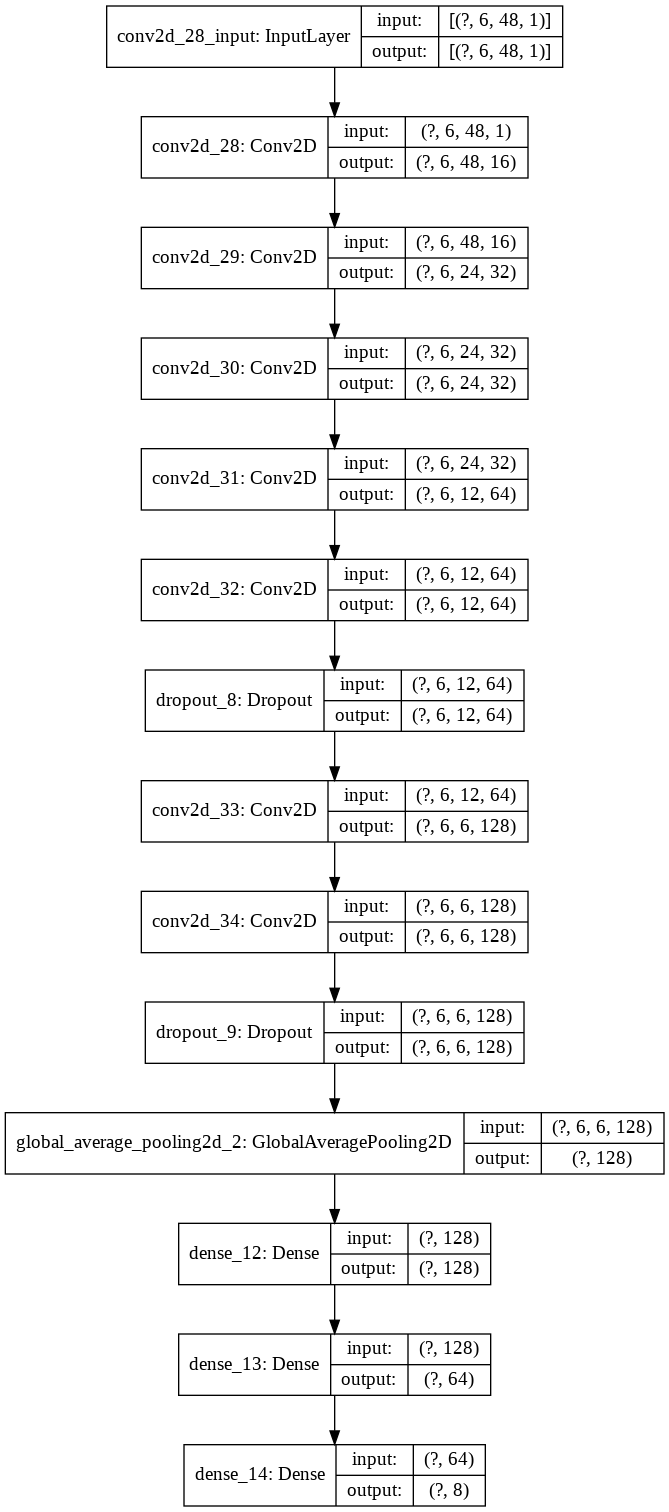

In [66]:
cnn_model_main = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape = (6,WINDOW_SIZE,1)), # 전 단계 필터 수의 2배인 240개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(32,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'), # 전 단계 필터 수의 1/2배인 120개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(64,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(128,3,strides=(1,2),padding='same',activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Dropout(0.1),
    keras.layers.GlobalAveragePooling2D(),
    #keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='softmax')  #stop 빼는 경우
])
cnn_model_main.summary()
cnn_model_main.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(cnn_model_main, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 6, 48, 16)         160       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 6, 24, 32)         4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 6, 24, 32)         9248      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 6, 12, 64)         18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 6, 12, 64)         36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 6, 6, 128)        

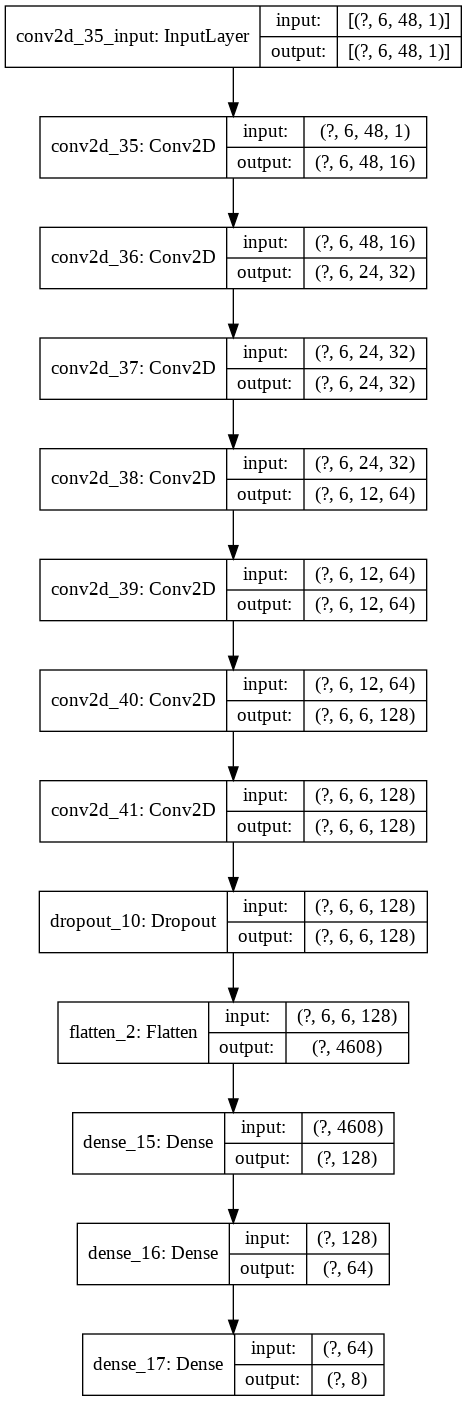

In [67]:
cnn_model_sub = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape = (6,WINDOW_SIZE,1)), # 전 단계 필터 수의 2배인 240개의 3x3 matrix filters
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(32,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'), # 전 단계 필터 수의 1/2배인 120개의 3x3 matrix filters
    #keras.layers.Dropout(0.2),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(64,3,strides=(1,2),padding='same',activation='relu'),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.Conv2D(128,3,strides=(1,2),padding='same',activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=2,strides=(1,2),padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Dropout(0.2),
    #keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='softmax')  #stop 빼는 경우
])
cnn_model_sub.summary()
cnn_model_sub.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(cnn_model_sub, show_shapes=True)

###CNN MODEL 학습

In [69]:
model_checkpoint_callback_1 = keras.callbacks.ModelCheckpoint(
    filepath= '/content',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model_checkpoint_callback_2 = keras.callbacks.ModelCheckpoint(
    filepath= '/content/sample_data',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [70]:
cnn_history_1 = cnn_model_main.fit(tr_c_data , tr_label , epochs=30, batch_size=64, callbacks = [model_checkpoint_callback_1], validation_data=(re_c_data, re_label))

Epoch 1/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.3273 - accuracy: 0.8823 - val_loss: 0.6036 - val_accuracy: 0.8613
Epoch 2/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.1436 - accuracy: 0.9478 - val_loss: 0.7671 - val_accuracy: 0.8645
Epoch 3/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.1013 - accuracy: 0.9638 - val_loss: 0.8142 - val_accuracy: 0.8693
Epoch 4/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.0800 - accuracy: 0.9716 - val_loss: 0.9284 - val_accuracy: 0.8636
Epoch 5/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.0683 - accuracy: 0.9756 - val_loss: 0.8470 - val_accuracy: 0.8739
Epoch 6/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.0614 - accuracy: 0.9785 - val_loss: 0.9639 - val_accuracy: 0.8695
Epoch 7/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.0561 - accuracy: 0.9805 - val_loss: 1.1127 - val_ac

In [71]:
cnn_history_2 = cnn_model_sub.fit(tr_c_data , tr_label , epochs=30 , batch_size=64, callbacks = [model_checkpoint_callback_2], validation_data=(re_c_data, re_label))

Epoch 1/30
4877/4877 [==============================] - 24s 5ms/step - loss: 0.2710 - accuracy: 0.9028 - val_loss: 0.6124 - val_accuracy: 0.8676
Epoch 2/30
4877/4877 [==============================] - 24s 5ms/step - loss: 0.1290 - accuracy: 0.9527 - val_loss: 0.8643 - val_accuracy: 0.8567
Epoch 3/30
4877/4877 [==============================] - 25s 5ms/step - loss: 0.1004 - accuracy: 0.9639 - val_loss: 0.8969 - val_accuracy: 0.8766
Epoch 4/30
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0849 - accuracy: 0.9696 - val_loss: 1.0903 - val_accuracy: 0.8748
Epoch 5/30
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0762 - accuracy: 0.9733 - val_loss: 1.0052 - val_accuracy: 0.8774
Epoch 6/30
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0722 - accuracy: 0.9751 - val_loss: 1.0727 - val_accuracy: 0.8726
Epoch 7/30
4877/4877 [==============================] - 24s 5ms/step - loss: 0.0671 - accuracy: 0.9769 - val_loss: 1.2130 - val_ac

##<h2>**모델 예측**</h2>

###CNN 예측

In [72]:
cnn_test_predictions_1 = cnn_model_main.predict(te_c_data)
cnn_test_predictions_2 = cnn_model_sub.predict(te_c_data)
cnn_real_predictions_1 = cnn_model_main.predict(re_c_data)
cnn_real_predictions_2 = cnn_model_sub.predict(re_c_data)

In [73]:
cnn_model_main.load_weights('/content')
cnn_model_sub.load_weights('/content/sample_data')
cnn_test_predictions_3 = cnn_model_main.predict(te_c_data)
cnn_test_predictions_4 = cnn_model_sub.predict(te_c_data)
cnn_real_predictions_3 = cnn_model_main.predict(re_c_data)
cnn_real_predictions_4 = cnn_model_sub.predict(re_c_data)

####Model Merge

In [74]:
print(type(cnn_test_predictions_1))
count = 0
cnn_test_predictions = []
for main_pred in cnn_test_predictions_1:
  if 0 < np.argmax(cnn_test_predictions_2[count]) < 5:
    cnn_test_predictions.append(np.argmax(cnn_test_predictions_2[count]))
  else:
    cnn_test_predictions.append(np.argmax(main_pred))
  count = count + 1
cnn_test_predictions = np.array(cnn_test_predictions)

<class 'numpy.ndarray'>


In [75]:
print(type(cnn_real_predictions_1))
count = 0
cnn_real_predictions = []
for main_pred in cnn_real_predictions_1:
  if 0 < np.argmax(cnn_real_predictions_2[count]) < 5:
    cnn_real_predictions.append(np.argmax(cnn_real_predictions_2[count]))
  else:
    cnn_real_predictions.append(np.argmax(main_pred))
  count = count + 1
cnn_real_predictions = np.array(cnn_real_predictions)

<class 'numpy.ndarray'>


In [76]:
print(type(cnn_test_predictions_3))
count = 0
cnn_test_predictions_5 = []
for main_pred in cnn_test_predictions_3:
  if 0 < np.argmax(cnn_test_predictions_4[count]) < 5:
    cnn_test_predictions_5.append(np.argmax(cnn_test_predictions_4[count]))
  else:
    cnn_test_predictions_5.append(np.argmax(main_pred))
  count = count + 1
cnn_test_predictions_5 = np.array(cnn_test_predictions_5)

<class 'numpy.ndarray'>


In [77]:
print(type(cnn_real_predictions_3))
count = 0
cnn_real_predictions_5 = []
for main_pred in cnn_real_predictions_3:
  if 0 < np.argmax(cnn_real_predictions_4[count]) < 5:
    cnn_real_predictions_5.append(np.argmax(cnn_real_predictions_4[count]))
  else:
    cnn_real_predictions_5.append(np.argmax(main_pred))
  count = count + 1
cnn_real_predictions_5 = np.array(cnn_real_predictions_5)

<class 'numpy.ndarray'>


####cnn 테스트 데이터

In [30]:
from sklearn.metrics import confusion_matrix

In [78]:
matrix = confusion_matrix(te_label, cnn_test_predictions)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[7954  541  612   43   54  786  452   21]
 [ 133 1620    0   72    0   41  135    0]
 [ 240    0 1602   55  189   17   73    4]
 [  31   48    0  453    0   60    0    0]
 [  99    0   64    5 1039   32   20    0]
 [  97   54   29   10    0  327    9    2]
 [  72    0  112    0    0    4  258    0]
 [   0    0    0    0    0    0    0  582]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[ 76   5   5   0   0   7   4   0]
 [  6  80   0   3   0   2   6   0]
 [ 11   0  73   2   8   0   3   0]
 [  5   8   0  76   0  10   0   0]
 [  7   0   5   0  82   2   1   0]
 [ 18  10   5   1   0  61   1   0]
 [ 16   0  25   0   0   0  57   0]
 [  0   0   0   0   0   0   0 100]]


In [79]:
matrix = confusion_matrix(te_label, cnn_test_predictions_1.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8322  403  320   20   64  839  469   26]
 [ 194 1523    0   43    0   91  149    1]
 [ 386    0 1390   25  184   18  173    4]
 [  50   19    0  457    0   66    0    0]
 [ 118    0   41    0 1032   42   26    0]
 [ 108   26    7   21    0  355    9    2]
 [  73    0  106    0    0    4  263    0]
 [   0    0    0    0    0    0    0  582]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[ 79   3   3   0   0   8   4   0]
 [  9  76   0   2   0   4   7   0]
 [ 17   0  63   1   8   0   7   0]
 [  8   3   0  77   0  11   0   0]
 [  9   0   3   0  81   3   2   0]
 [ 20   4   1   3   0  67   1   0]
 [ 16   0  23   0   0   0  58   0]
 [  0   0   0   0   0   0   0 100]]


In [80]:
matrix = confusion_matrix(te_label, cnn_test_predictions_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8573  440  520   39   35  517  328   11]
 [ 262 1479    0   59    0  104   97    0]
 [ 310    0 1560   52  171   18   67    2]
 [  43   48    0  445    0   54    2    0]
 [ 143    0   61    5 1007   18   25    0]
 [ 175   44   22    1    0  239   47    0]
 [  86    0  106    0    0    0  254    0]
 [  16    0    0    0    0    0    0  566]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[81  4  4  0  0  4  3  0]
 [13 73  0  2  0  5  4  0]
 [14  0 71  2  7  0  3  0]
 [ 7  8  0 75  0  9  0  0]
 [11  0  4  0 79  1  1  0]
 [33  8  4  0  0 45  8  0]
 [19  0 23  0  0  0 56  0]
 [ 2  0  0  0  0  0  0 97]]


####cnn Callback 테스트 데이터

In [81]:
matrix = confusion_matrix(te_label, cnn_test_predictions_5)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[7943  520  577   47   89  813  458   16]
 [ 108 1631    2   79    0   37  144    0]
 [ 192    6 1572   39  232   16  119    4]
 [  32   48    0  468    7   37    0    0]
 [  91    0   45   23 1051   30   19    0]
 [  85   47   29   44    3  310    9    1]
 [  65    8  114    0    0    4  255    0]
 [   0    0    0    0    0    0    0  582]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[ 75   4   5   0   0   7   4   0]
 [  5  81   0   3   0   1   7   0]
 [  8   0  72   1  10   0   5   0]
 [  5   8   0  79   1   6   0   0]
 [  7   0   3   1  83   2   1   0]
 [ 16   8   5   8   0  58   1   0]
 [ 14   1  25   0   0   0  57   0]
 [  0   0   0   0   0   0   0 100]]


In [82]:
matrix = confusion_matrix(te_label, cnn_test_predictions_3.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8322  403  320   20   64  839  469   26]
 [ 194 1523    0   43    0   91  149    1]
 [ 386    0 1390   25  184   18  173    4]
 [  50   19    0  457    0   66    0    0]
 [ 118    0   41    0 1032   42   26    0]
 [ 108   26    7   21    0  355    9    2]
 [  73    0  106    0    0    4  263    0]
 [   0    0    0    0    0    0    0  582]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[ 79   3   3   0   0   8   4   0]
 [  9  76   0   2   0   4   7   0]
 [ 17   0  63   1   8   0   7   0]
 [  8   3   0  77   0  11   0   0]
 [  9   0   3   0  81   3   2   0]
 [ 20   4   1   3   0  67   1   0]
 [ 16   0  23   0   0   0  58   0]
 [  0   0   0   0   0   0   0 100]]


In [83]:
matrix = confusion_matrix(te_label, cnn_test_predictions_4.argmax(axis=1))
print(matrix)
print(np.bincount(te_label)[:, np.newaxis])
print((matrix / np.bincount(te_label)[:, np.newaxis] * 100).astype(np.int))

[[8451  388  522   42   76  506  470    8]
 [ 234 1507    2   75    0   76  107    0]
 [ 285    6 1509   33  223   12  112    0]
 [  43   48    0  451    7   43    0    0]
 [ 160    0   41   23  994    0   41    0]
 [ 161   43   22   35    3  234   30    0]
 [  69    8  111    0    0    0  258    0]
 [  21    0    0    0    0    0    0  561]]
[[10463]
 [ 2001]
 [ 2180]
 [  592]
 [ 1259]
 [  528]
 [  446]
 [  582]]
[[80  3  4  0  0  4  4  0]
 [11 75  0  3  0  3  5  0]
 [13  0 69  1 10  0  5  0]
 [ 7  8  0 76  1  7  0  0]
 [12  0  3  1 78  0  3  0]
 [30  8  4  6  0 44  5  0]
 [15  1 24  0  0  0 57  0]
 [ 3  0  0  0  0  0  0 96]]


####cnn 실제 데이터

In [84]:
matrix = confusion_matrix(re_label, cnn_real_predictions)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22406    50   119   110   125   267   126   179]
 [ 1359  2261     2   303     2   282     9    25]
 [  977     0  1572     0   355    88   115     2]
 [  107     3     0  1383     1    24     2     0]
 [   56     0     1     0  1502     0     2     6]
 [  404    53     2    84     1  1008    19     0]
 [  233     5    98     3   138    27   662     2]
 [  260    20     0    49    92     0     0 16233]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[95  0  0  0  0  1  0  0]
 [32 53  0  7  0  6  0  0]
 [31  0 50  0 11  2  3  0]
 [ 7  0  0 90  0  1  0  0]
 [ 3  0  0  0 95  0  0  0]
 [25  3  0  5  0 64  1  0]
 [19  0  8  0 11  2 56  0]
 [ 1  0  0  0  0  0  0 97]]


In [85]:
matrix = confusion_matrix(re_label, cnn_real_predictions_1.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22525    35    77    56    94   276   130   189]
 [ 1565  2095     2   188     2   352     9    30]
 [ 1184     0  1213     0   433    97   180     2]
 [  124    53     0  1249     0    46     8    40]
 [   57     0     3     1  1491     0     2    13]
 [  423    35     1    43     1  1049    19     0]
 [  255     0    61     1   122    29   698     2]
 [  262    25     0    35    77     0     0 16255]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[96  0  0  0  0  1  0  0]
 [36 49  0  4  0  8  0  0]
 [38  0 39  0 13  3  5  0]
 [ 8  3  0 82  0  3  0  2]
 [ 3  0  0  0 95  0  0  0]
 [26  2  0  2  0 66  1  0]
 [21  0  5  0 10  2 59  0]
 [ 1  0  0  0  0  0  0 97]]


In [86]:
matrix = confusion_matrix(re_label, cnn_real_predictions_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22688    26    83    92    96   144    86   167]
 [ 1706  1876     2   251     2   387     1    18]
 [ 1192     0  1469     0   302    50    93     3]
 [  140     1     0  1349     1    29     0     0]
 [   85     0     1     0  1473     0     5     3]
 [  490    40     1    65     0   947    28     0]
 [  382     5    79     2   106    22   572     0]
 [  325     0     0    46    90     0     0 16193]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[97  0  0  0  0  0  0  0]
 [40 44  0  5  0  9  0  0]
 [38  0 47  0  9  1  2  0]
 [ 9  0  0 88  0  1  0  0]
 [ 5  0  0  0 94  0  0  0]
 [31  2  0  4  0 60  1  0]
 [32  0  6  0  9  1 48  0]
 [ 1  0  0  0  0  0  0 97]]


####cnn Callback 실제 데이터

In [87]:
matrix = confusion_matrix(re_label, cnn_real_predictions_5)#_2.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22435    43   119    96   111   269   127   182]
 [ 1371  2323     0   262     7   245     8    27]
 [  956     0  1595     0   338    96   122     2]
 [   96    22     0  1366     2    26     4     4]
 [   49     0     1     3  1512     0     2     0]
 [  394    99     2    78     2   978    18     0]
 [  244     2    84     3   133    28   672     2]
 [  260    20     0    46    92     0     0 16236]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[95  0  0  0  0  1  0  0]
 [32 54  0  6  0  5  0  0]
 [30  0 51  0 10  3  3  0]
 [ 6  1  0 89  0  1  0  0]
 [ 3  0  0  0 96  0  0  0]
 [25  6  0  4  0 62  1  0]
 [20  0  7  0 11  2 57  0]
 [ 1  0  0  0  0  0  0 97]]


In [88]:
matrix = confusion_matrix(re_label, cnn_real_predictions_3.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22525    35    77    56    94   276   130   189]
 [ 1565  2095     2   188     2   352     9    30]
 [ 1184     0  1213     0   433    97   180     2]
 [  124    53     0  1249     0    46     8    40]
 [   57     0     3     1  1491     0     2    13]
 [  423    35     1    43     1  1049    19     0]
 [  255     0    61     1   122    29   698     2]
 [  262    25     0    35    77     0     0 16255]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[96  0  0  0  0  1  0  0]
 [36 49  0  4  0  8  0  0]
 [38  0 39  0 13  3  5  0]
 [ 8  3  0 82  0  3  0  2]
 [ 3  0  0  0 95  0  0  0]
 [26  2  0  2  0 66  1  0]
 [21  0  5  0 10  2 59  0]
 [ 1  0  0  0  0  0  0 97]]


In [89]:
matrix = confusion_matrix(re_label, cnn_real_predictions_4.argmax(axis=1))
print(matrix)
print(np.bincount(re_label)[:, np.newaxis])
print((matrix / np.bincount(re_label)[:, np.newaxis] * 100).astype(np.int))

[[22756    21    94    77    78    95    74   187]
 [ 1751  1978     0   233     6   254    10    11]
 [ 1154     0  1491     0   269    60   130     5]
 [  131    22     0  1328     2    36     0     1]
 [   94     0     1     2  1466     0     4     0]
 [  531    89     1    55     1   876    18     0]
 [  333     2    55     3    93     9   673     0]
 [  325     6     0    36    91     0     0 16196]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[97  0  0  0  0  0  0  0]
 [41 46  0  5  0  5  0  0]
 [37  0 47  0  8  1  4  0]
 [ 8  1  0 87  0  2  0  0]
 [ 5  0  0  0 93  0  0  0]
 [33  5  0  3  0 55  1  0]
 [28  0  4  0  7  0 57  0]
 [ 1  0  0  0  0  0  0 97]]


## 모델 저장하기

In [94]:
from keras.models import load_model
cnn_model_main.save('Sim2Real_Model_CNN_GAP.h5')
cnn_model_sub.save('Sim2Real_Model_CNN_FLATTEN.h5')

## 예측결과 출력 CNN TEST

In [90]:
#cnn_test_predictions = cnn_model.predict(te_c_data)
#cnn_test_predictions,cnn_test_predictions_5
txt = 'Pred_Direction_Final,Pred_Direction_Best,TEST_Direction\n'
count = 0
for temp in te_c_data:
  if(np.argmax(cnn_test_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_test_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_test_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_test_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_test_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_test_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_test_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(np.argmax(cnn_test_predictions_5[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_test_predictions_5[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_test_predictions_5[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_test_predictions_5[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_test_predictions_5[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_test_predictions_5[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_test_predictions_5[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(test_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(test_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(test_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(test_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(test_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(test_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(test_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1

In [91]:
f = open("/content/cnn_test_pred_output.csv",'w')
f.write(txt)
f.close()

## 예측결과 출력 CNN REAL

In [92]:
#cnn_real_predictions = cnn_model.predict(re_c_data)
#cnn_real_predictions,cnn_real_predictions_5
txt = 'Pred_Direction_Final,Pred_Direction_Best,Real_Direction\n'
count = 0
for temp in re_c_data:
  if(np.argmax(cnn_real_predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_real_predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_real_predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_real_predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_real_predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_real_predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(np.argmax(cnn_real_predictions_5[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(cnn_real_predictions_5[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(cnn_real_predictions_5[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(cnn_real_predictions_5[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(cnn_real_predictions_5[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(cnn_real_predictions_5[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(cnn_real_predictions_5[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(real_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(real_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(real_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(real_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(real_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(real_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(real_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + 'stop\n'
  count = count + 1

In [93]:
f = open("/content/cnn_real_pred_output.csv",'w')
f.write(txt)
f.close()